# Part I - Data Analysis of Ford GoBike - San Francisco Bay Area
## by Dasaprakash

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area **for the month of February 2019**.

* duration_sec: Duration of the ride in seconds
* start_time: Start time of the ride
* end_time: End time of the ride
* start_station_id: Id of starting station
* start_station_name: Name of the starting station
* start_station_latitude: Latitude of starting station
* start_station_longitude: Longitude of starting station
* end_station_id: Id of end station
* end_station_name: Name of the end station
* end_station_latitude: Latitude of end station
* end_station_longitude: Longitude of end station
* bike_id: Id of the bike used for ride sharing
* user_type: Type of the user (Customer/Subscriber)
* member_birth_year: Birth year of the member or subscriber
* member_gender: Gender of the member or subscriber
* bike_share_for_all_trip: Boolean field which says if the bike is shared for the whole trip 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df[df.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


## Data Wrangling

### Observations:

* start_time and end_time should be of type datetime
* start_station_id and end_sstation_id should be present for rides - We will drop those rows with null values for these columns
* start_station_id and end_station_id should of type int64

### Define

Change the data types of the start_time and end_time columns to datatime data type

In [8]:
df_clean = df.copy()

### Code

In [9]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

### Test

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Define

* Drop the rows with start_station_id and end_station_id as null

### Code

In [11]:
df_clean = df_clean[~df_clean.start_station_id.isna()]

### Test

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

### Define

Change the data types of the start_station_id, end_station_id and member_birth_year columns to int

### Code

In [13]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int64')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int64')

### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [15]:
df_clean.shape

(183215, 16)

### What is the structure of your dataset?

> The dataset has 183215 rides with 16 features

### What is/are the main feature(s) of interest in your dataset?

> The main features are duration_sec, user_type, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The supporting features are start_station_name, end_station_name, start_time, end_time

## Univariate Exploration

> **Question: Which user type used the bike share the most?**

> **Visualization:**

In [16]:
df_user_type = df_clean.user_type.value_counts().reset_index()
df_user_type.columns = ['User Type', 'Count']
df_user_type

,User Type,Count
0,Subscriber,163414
1,Customer,19801


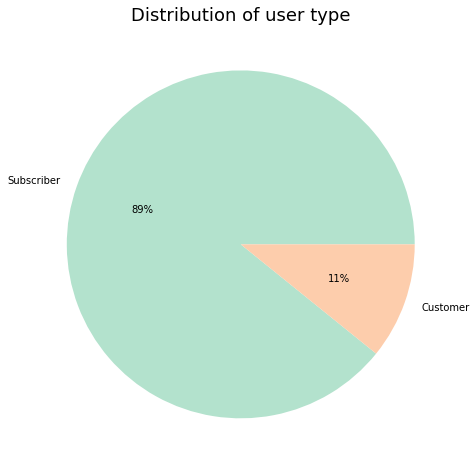

In [17]:
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=df_user_type['Count'], labels=df_user_type['User Type'], colors=colors, autopct='%.0f%%', )
plt.title('Distribution of user type', fontsize=18);
plt.show();

In [72]:
def plot_count_plot(data, feature, xlabel, ylabel, title):
    fig,ax = plt.subplots(figsize=(12,6))
    base_color = sns.color_palette()[0]
    sns.countplot(data=data, x=feature, color=base_color)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=18)
    plt.show();

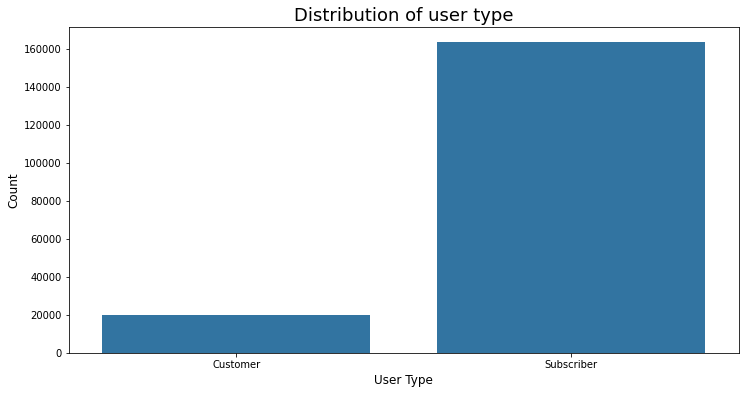

In [73]:
plot_count_plot(df_clean, 'user_type', 'User Type', 'Count', 'Distribution of user type')

> **Observation: 89% of the rides are by subscibers and 11% by customers**

> **Question: What is the distriibution of duration by seconds?**

> **Visualization:**

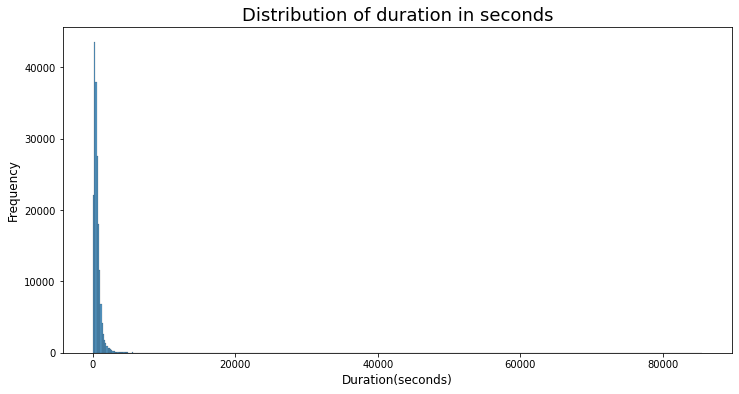

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.histplot(df_clean['duration_sec'].values, bins=500, kde=False);
plt.xlabel('Duration(seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of duration in seconds', fontsize=18)
plt.show();

> **Observation: The distribution is right skewed and requires transformation.**

> **Question: Will transforming the data make the ditribution normal?**

> **Visualization:**

In [20]:
np.log10(df_clean['duration_sec'].describe())

count    5.262961
mean     2.860878
std      3.254083
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

> **The minimum value after log10 transformation is 1.7 and max is <5**

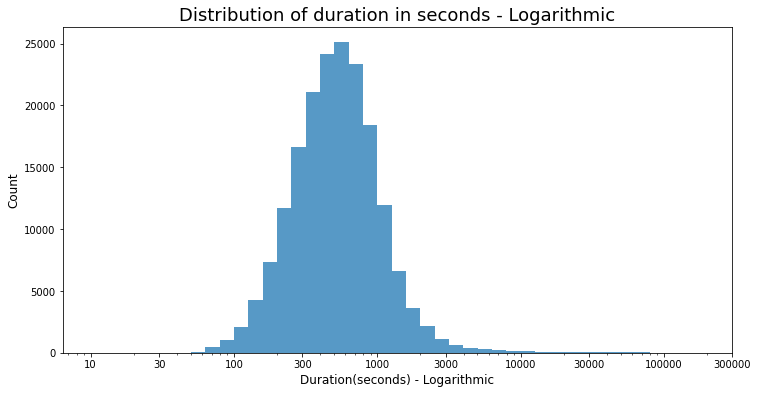

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
bins = 10**np.arange(1, 5, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
sns.histplot(df_clean['duration_sec'], bins=bins)
plt.xlabel('Duration(seconds) - Logarithmic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of duration in seconds - Logarithmic', fontsize=18)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.show();

> **Observation: Transforming data to logarithmic scale gets a normal distribution**

> **Question: What's the percentage of rides where the bike is shared for the whole trip?**

> **Visualization:**

In [22]:
df_bike_share_for_all_trip = df_clean['bike_share_for_all_trip'].value_counts().reset_index()
df_bike_share_for_all_trip.columns = ['Bike_share_for_all_trip', 'Count']
df_bike_share_for_all_trip

,Bike_share_for_all_trip,Count
0,No,165869
1,Yes,17346


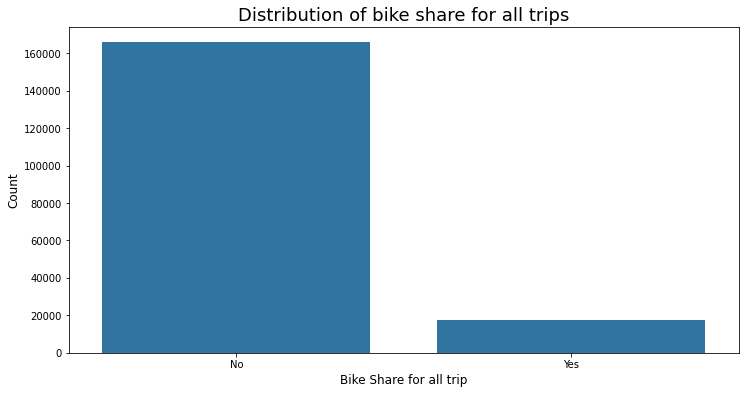

In [74]:
plot_count_plot(df_clean, 'bike_share_for_all_trip', 'Bike Share for all trip', 'Count', 'Distribution of bike share for all trips')

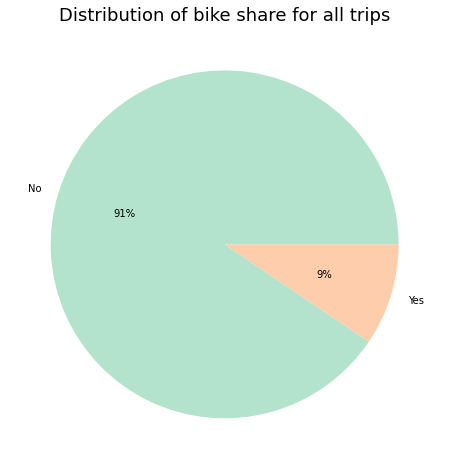

In [24]:
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=df_bike_share_for_all_trip['Count'], labels=df_bike_share_for_all_trip['Bike_share_for_all_trip'], colors=colors, autopct='%.0f%%', )
plt.title('Distribution of bike share for all trips', fontsize=18);
plt.show();

> **Observation: Bike is shared for the whole trip only for 9% of the rides**

> **Question: During which weekdays were the bike ride high and low?**

> **Visualization:**

In [25]:
df_clean['hour'] = df_clean['start_time'].dt.hour
df_clean['weekday'] = df_clean['start_time'].dt.weekday
df_clean['day'] = df_clean['start_time'].dt.day
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,weekday,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,3,28
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,3,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,3,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,3,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,3,28


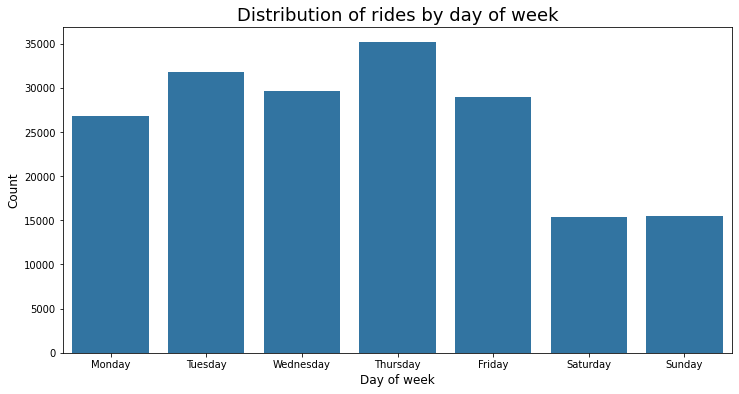

In [26]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.countplot(x=df_clean['weekday'], color=base_color)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of rides by day of week', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show();

>**Observation: Maximum number of rides happened on Thursdays and lowest on Saturday and Sunday compared to weekdays**

>**Question:Which day of the month (February 2019) has highest and lowest rides?**

>**Visualization**

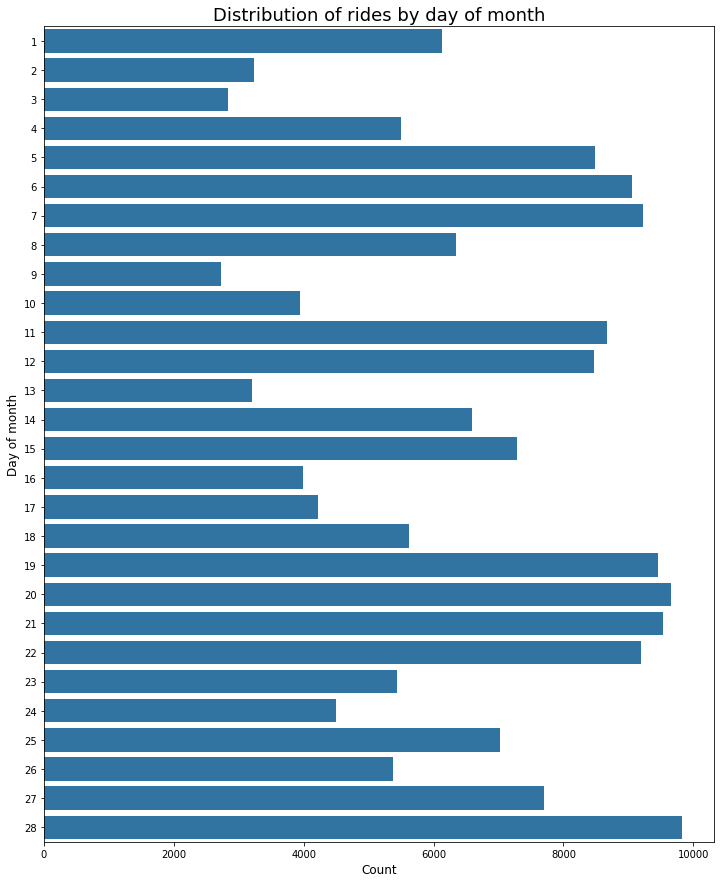

In [27]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.countplot(y=df_clean['day'], color=base_color, orient='h')
plt.ylabel('Day of month', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides by day of month', fontsize=18)
plt.show();

>**Observation: Maximum number of rides were on 28th Feb and minimum on 9th Feb**

>**Question: Which hours of the day were the rides highest? Did peak hours make any difference?**

>**Visualization:**

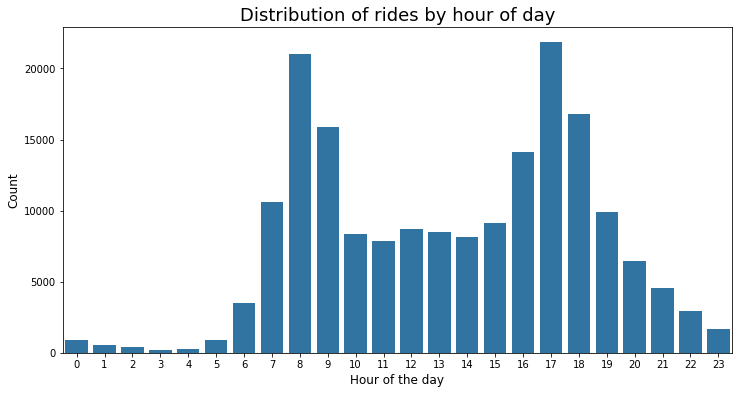

In [75]:
plot_count_plot(df_clean, 'hour', 'Hour of the day', 'Count', 'Distribution of rides by hour of day')

>**Observation: Rides were highest between 8-10AM and 5-7PM which are clearly peak hours**

>**Question: Which starting station contributed to the highest rides?**

>**Visualization:**

In [76]:
df_start_station = df_clean['start_station_name'].value_counts()[:20].reset_index()
df_start_station.columns = ['Start_station', 'Count']

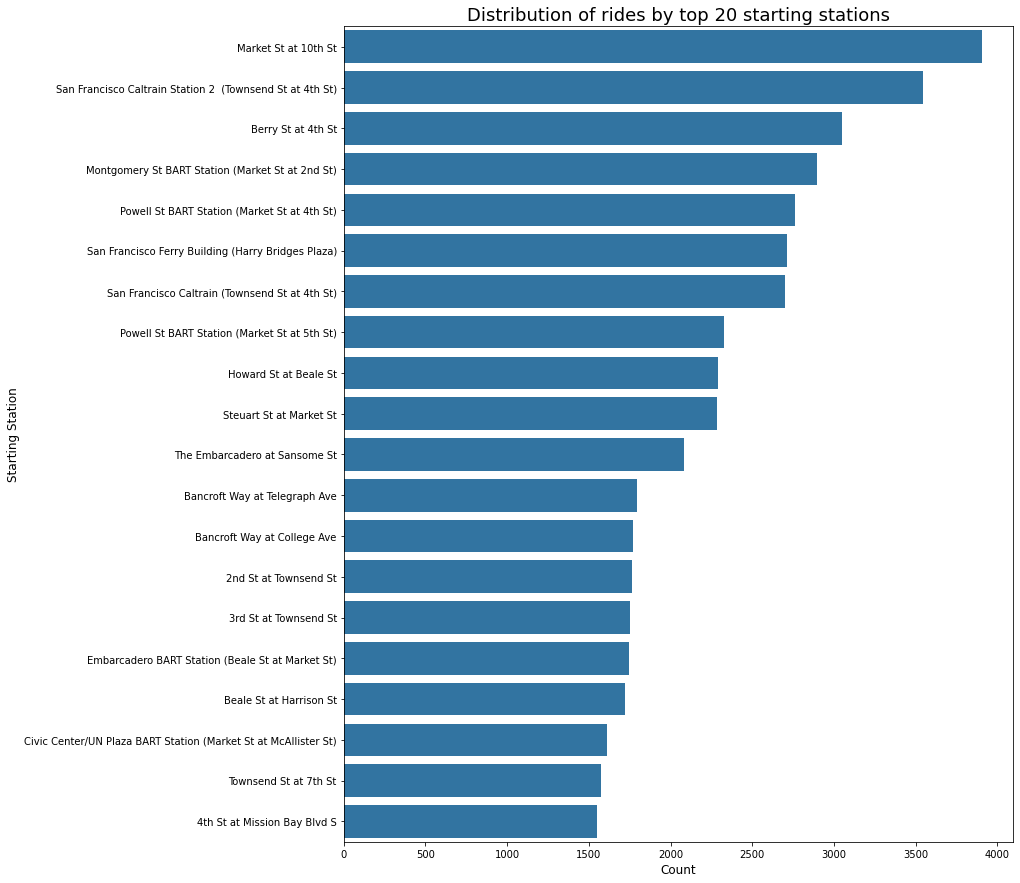

In [77]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.barplot(x=df_start_station['Count'], y=df_start_station['Start_station'], color=base_color, orient='h')
plt.ylabel('Starting Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides by top 20 starting stations', fontsize=18)
plt.show();

>**Observation:Market St at 10th St is where most rides originated**

>**Question: Which is destination station had the highest rides? **

>**Visualization:**

In [78]:
df_end_station = df_clean['end_station_name'].value_counts()[:20].reset_index()
df_end_station.columns = ['End_station', 'Count']

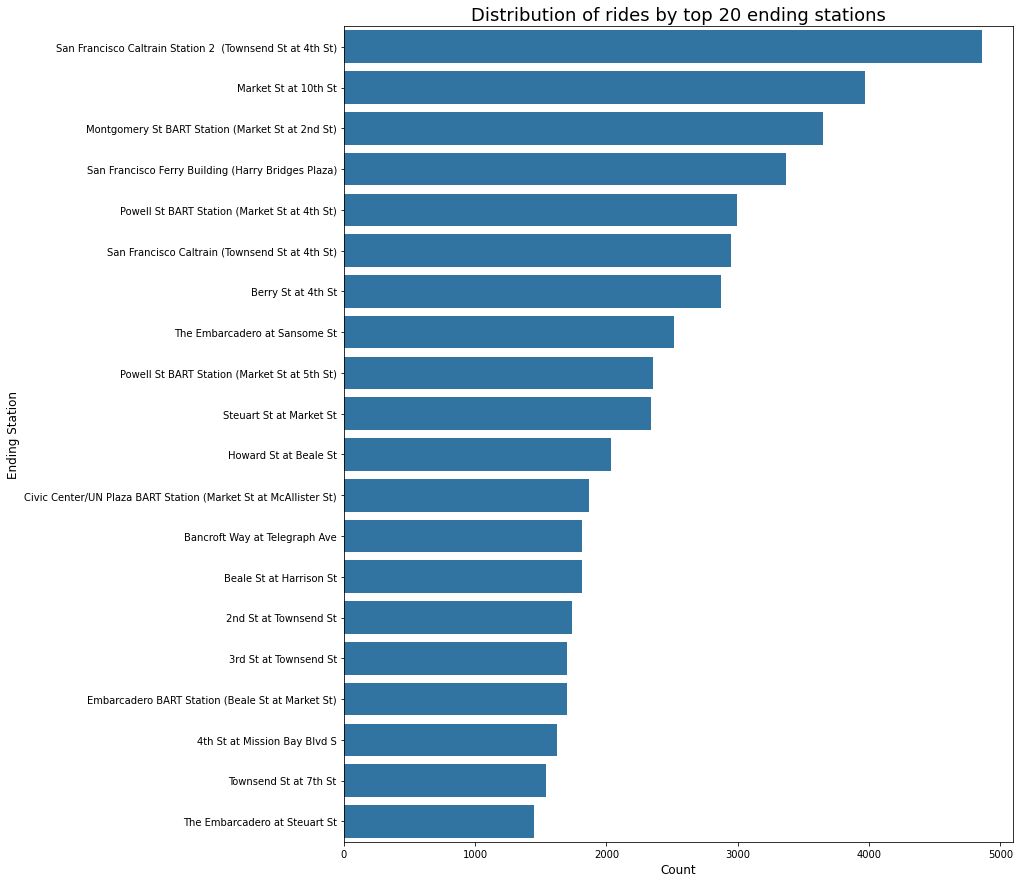

In [79]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.barplot(x=df_end_station['Count'], y=df_end_station['End_station'], color=base_color, orient='h')
plt.ylabel('Ending Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides by top 20 ending stations', fontsize=18)
plt.show();

>**Observation: San Francisco Caltrain Station 2 had most rides in destination. Also, almost all stations in starting stations occurred on destination list too**

>**Question: Which starting station has the lowest number of rides?**

>**Visualization:**

In [80]:
df_start_station = df_clean['start_station_name'].value_counts()[-20:].reset_index()
df_start_station.columns = ['Start_station', 'Count']

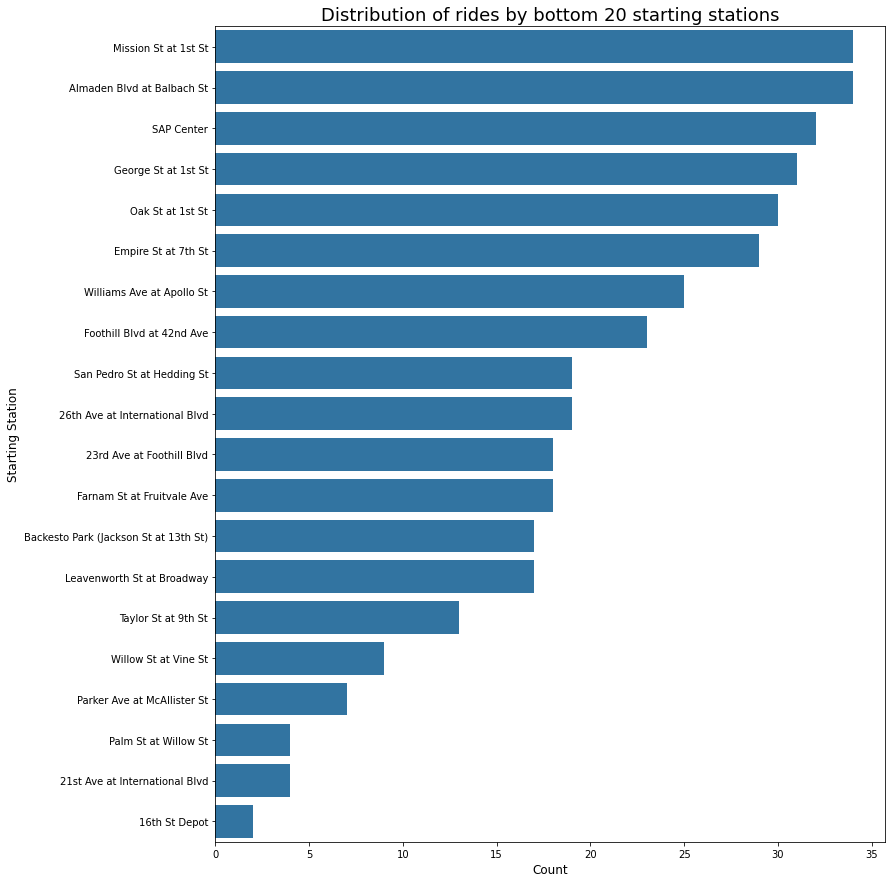

In [81]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.barplot(x=df_start_station['Count'], y=df_start_station['Start_station'], color=base_color, orient='h')
plt.ylabel('Starting Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides by bottom 20 starting stations', fontsize=18)
plt.show();

>**Observation: 16th Street depot had the lowest rides for starting station**

>**Question: Which destination station has the lowest number of rides?**

>**Visualization:**

In [82]:
df_end_station = df_clean['end_station_name'].value_counts()[-20:].reset_index()
df_end_station.columns = ['End_station', 'Count']

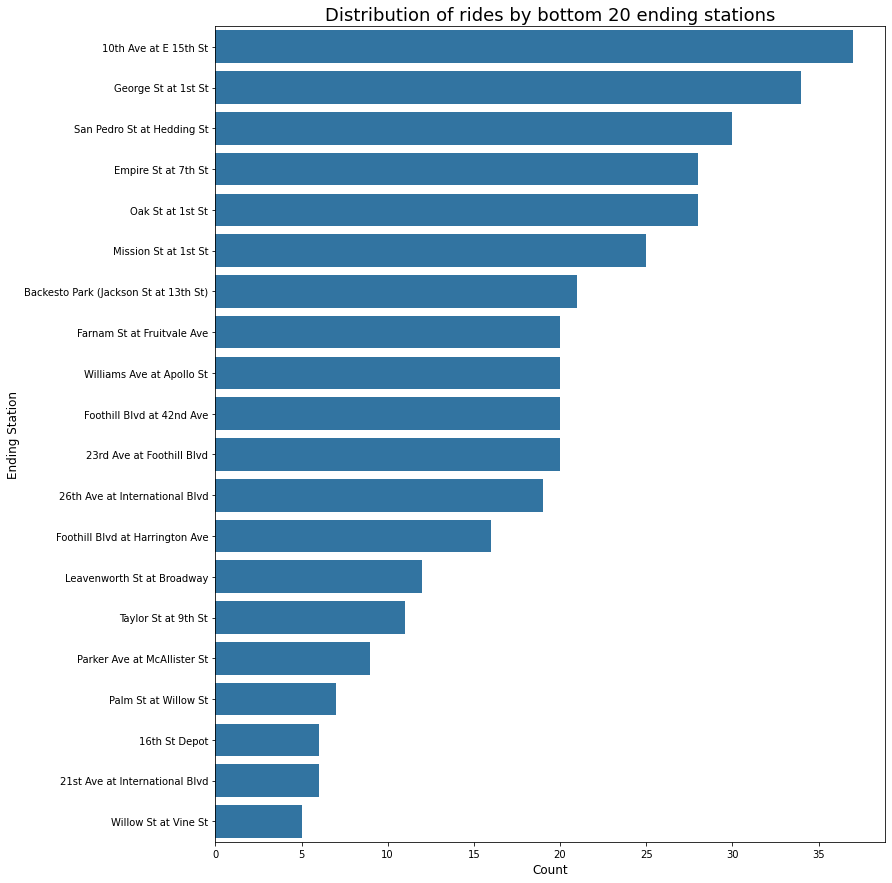

In [83]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.barplot(x=df_end_station['Count'], y=df_end_station['End_station'], color=base_color, orient='h')
plt.ylabel('Ending Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides by bottom 20 ending stations', fontsize=18)
plt.show();

>**Observation: Willow St at Vine St has the lowest number of rides**

>**Question: What is the distribution by gender?**

>**Visualization:**

In [84]:
df_member_gender = df_clean['member_gender'].value_counts().reset_index()
df_member_gender.columns = ['Gender', 'Count']

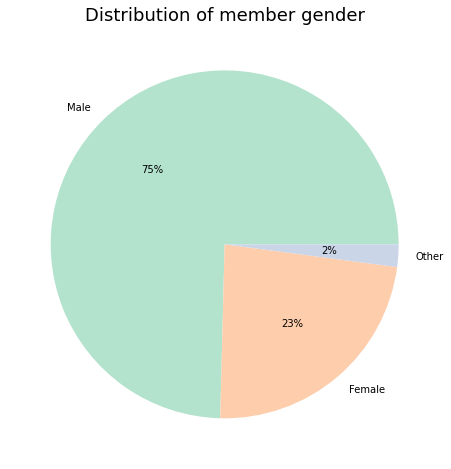

In [85]:
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=df_member_gender['Count'], labels=df_member_gender['Gender'], colors=colors, autopct='%.0f%%', )
plt.title('Distribution of member gender', fontsize=18);
plt.show();

>**Observation: 75% were male, 23% female and 2% Others based on gender data present**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec was right skewed and log scale transformation made the distribution normal. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Start time and end time were of object types and had to be converted to datetime datatype. The generated features like weekday, hour of the day and day of the month provided valuable insights 

## Bivariate Exploration

>**Question: What is the distribution of duration in seconds by user type?**

>**Visualization**

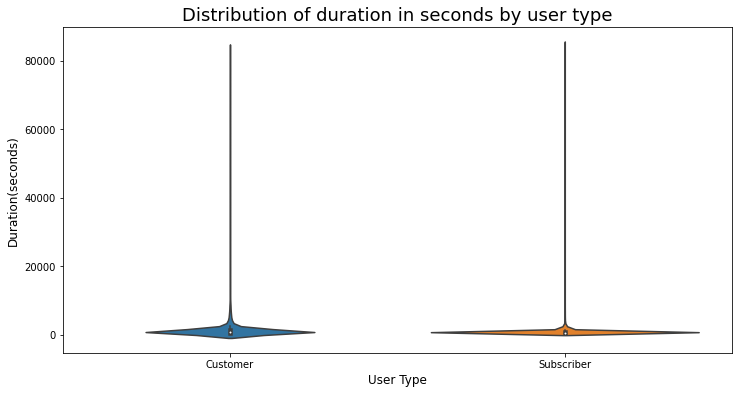

In [86]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(y=df_clean['duration_sec'], x=df_clean['user_type'], bins=bins)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration(seconds)', fontsize=12)
plt.title('Distribution of duration in seconds by user type', fontsize=18)
plt.show();

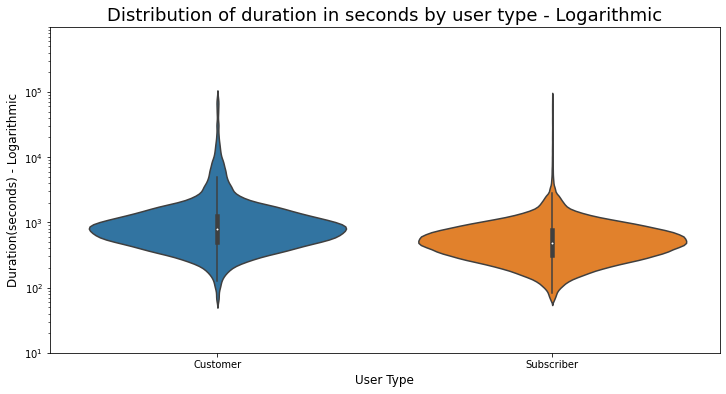

In [87]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(y=np.log10(df_clean['duration_sec']), x=df_clean['user_type'], bins=bins)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration(seconds) - Logarithmic', fontsize=12)
plt.title('Distribution of duration in seconds by user type - Logarithmic', fontsize=18)

#https://stackoverflow.com/questions/71717684/repeated-y-axis-ticks-in-violinplot
major_ticks = np.arange(np.floor(np.log10(df_clean['duration_sec']).min()), np.log10(df_clean['duration_sec']).max() + 1)
ax.yaxis.set_ticks(major_ticks, minor=False)
ax.yaxis.set_ticks([np.log10(x) for p in major_ticks for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
ax.yaxis.set_major_formatter(StrMethodFormatter("$10^{{{x:.0f}}}$"))
plt.show();

In [88]:
customer = df_clean['user_type']=='Customer'
subscriber = df_clean['user_type']=='Subscriber'

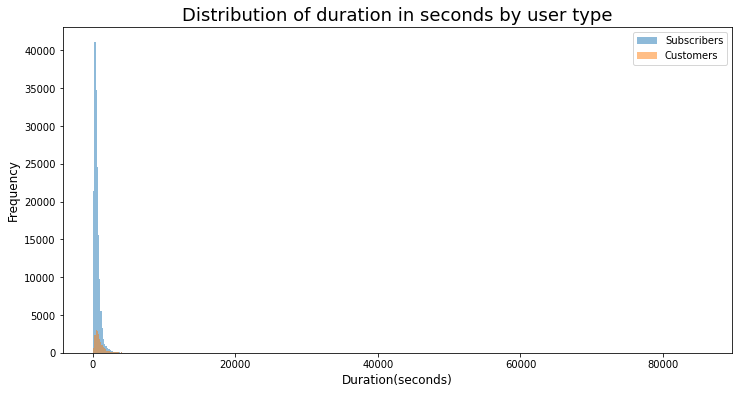

In [89]:
fig,ax = plt.subplots(figsize=(12,6))
plt.hist(df_clean[subscriber]['duration_sec'].values, bins=500, alpha=0.5, label='Subscribers')
plt.hist(df_clean[customer]['duration_sec'].values, bins=500, alpha=0.5, label='Customers')
plt.legend(loc='upper right')
plt.xlabel('Duration(seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of duration in seconds by user type', fontsize=18)
plt.show();

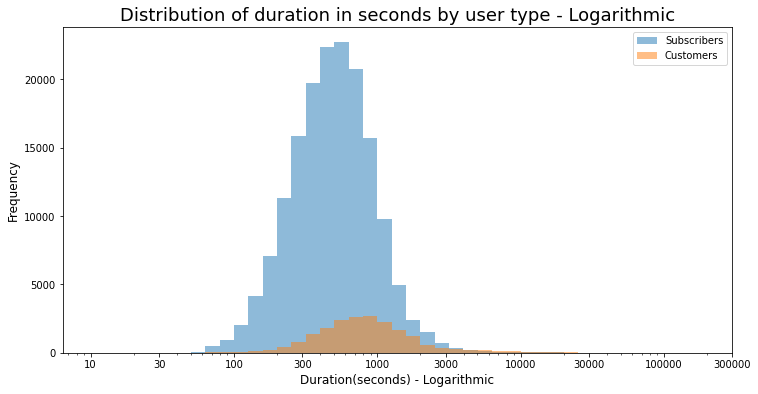

In [90]:
fig,ax = plt.subplots(figsize=(12,6))
bins = 10**np.arange(1, 5, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(df_clean[subscriber]['duration_sec'], bins=bins, alpha=0.5, label='Subscribers')
plt.hist(df_clean[customer]['duration_sec'], bins=bins, alpha=0.5, label='Customers')
plt.legend(loc='upper right')
plt.xlabel('Duration(seconds) - Logarithmic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of duration in seconds by user type - Logarithmic', fontsize=18)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.show();

>**Observation: The violinplot shows a long tail which shows data far from the median and upper quartile and in the histogram the data is clearly right skewed for both user types. After transforming the data to log scale we observe the data distribution changing to normal distribution.**

>**Question: What is the average ride duration by user type?**

>**Visualization:**

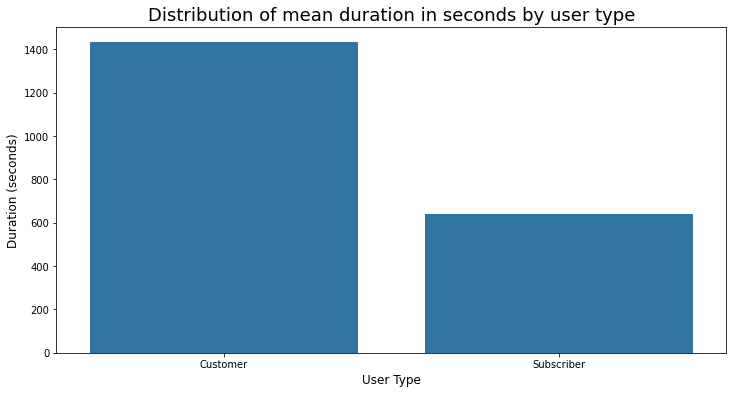

In [91]:
df_user_type_mean = df_clean[['duration_sec', 'user_type']].groupby('user_type').mean().reset_index()
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(x=df_user_type_mean['user_type'], y=df_user_type_mean['duration_sec'], color=base_color)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.title('Distribution of mean duration in seconds by user type', fontsize=18)
plt.show();

>**Observation:Even though the frequency of duration by user type is higher for subscriber the average duration travelled by customers (~ 1400) is higher than the customers (~ 600).**

>**Question:Did the customer complete the whole trip?**

>**Visualization**

In [96]:
def plot_bivariate_count_plot(data, feature, hue, xlabel, ylabel, title):
    fig,ax = plt.subplots(figsize=(12,6))
    sns.countplot(data=data, x=feature, hue=hue)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=18)
    plt.show();

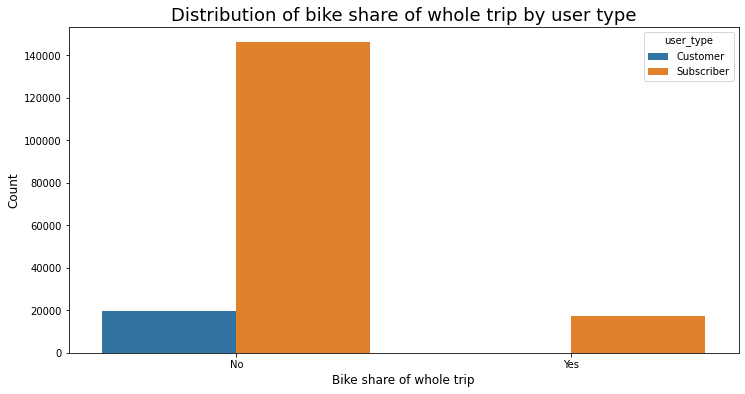

In [97]:
plot_bivariate_count_plot(df_clean, 'bike_share_for_all_trip', 'user_type', 'Bike share of whole trip', 'Count', 'Distribution of bike share of whole trip by user type')

>**Observation: The customer user typr were not available for the whole trip**

>**Question: Did the customers contribute to significant increase/decrese in the number of rides by day of the week?**

>**Visualization:**

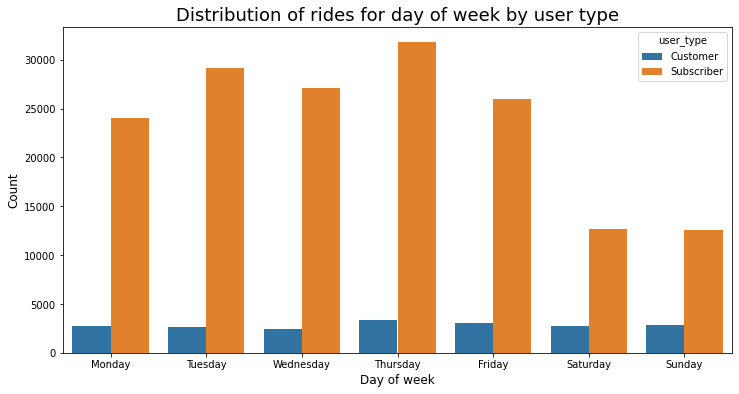

In [46]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='weekday', hue=df_clean['user_type'])
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of rides for day of week by user type', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show();

>**Observation: There are no significant variation in the number of rides by customers throughout the week**

>**Question: Did the customers contribute to significant increase/decrese in the number of rides by day of the month?**

>**Visualization:**

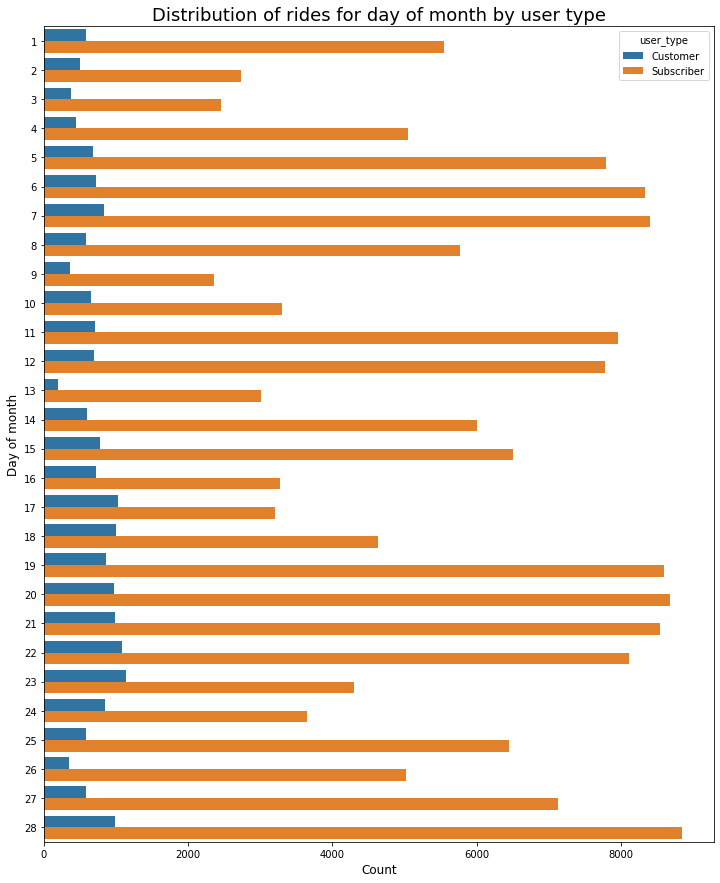

In [47]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, y='day', hue=df_clean['user_type'], orient='h')
plt.ylabel('Day of month', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Distribution of rides for day of month by user type', fontsize=18)
plt.show();

>**Observation: Even though the customers did not create much impact we can observe the pattern is proportional to the number of rides by subscribers.**

>**Question: Did the customers contribute to significant increase/decrese in the number of rides by hour of the day?**

>**Visualization:**

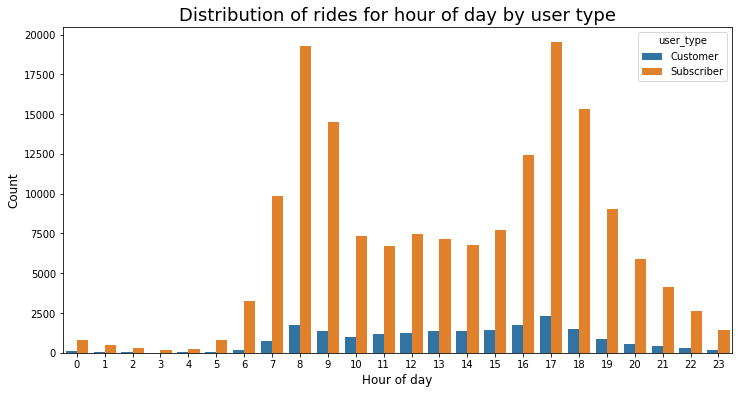

In [98]:
plot_bivariate_count_plot(df_clean, 'hour', 'user_type', 'Hour of day', 'Count', 'Distribution of rides for hour of day by user type')

>**Observation: Even though the customers did not create much impact we can observe the pattern is proportional to the number of rides by subscribers.**

>**Question: Is there any difference in the  distribution of duration in weekdays?**

>**Visualization:**

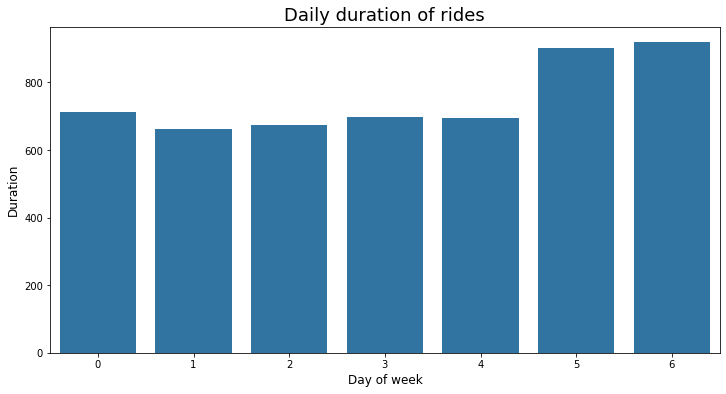

In [99]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_clean, x='weekday', y='duration_sec', color=base_color, ci=None)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Daily duration of rides', fontsize=18)
plt.show();

>**Observation: Even though the frequency of rides is lesser during the weekends, we observe the rides were longer during weekends than during weekdays.**

>**Question: Which day had the longest duration of rides and how does it compare with the frequency of the rides?**

>**Visualization:**

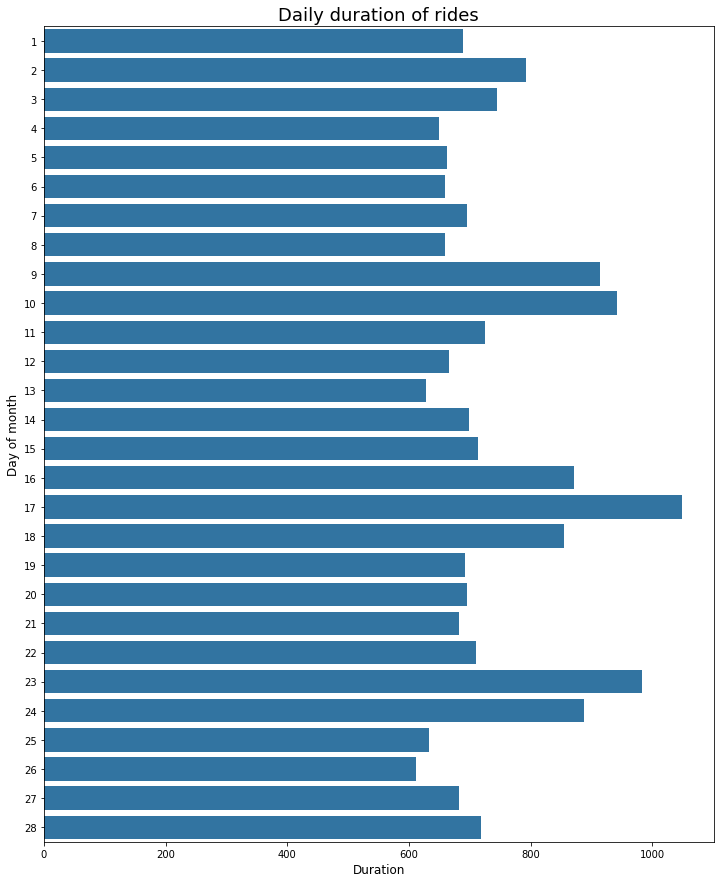

In [100]:
fig,ax = plt.subplots(figsize=(12,15))
base_color = sns.color_palette()[0]
sns.barplot(data=df_clean, y='day', x='duration_sec', color=base_color, orient='h', ci=None)
plt.ylabel('Day of month', fontsize=12)
plt.xlabel('Duration', fontsize=12)
plt.title('Daily duration of rides', fontsize=18)
plt.show();

>**Observation: 17th February 2019 had the maximum duration of rides even though 28th Feb had the maximum frequency of rides**

>**Question: Which hour of the day have maximum duration of rides and how does it compare with the frequency?**

>**Visualization:**

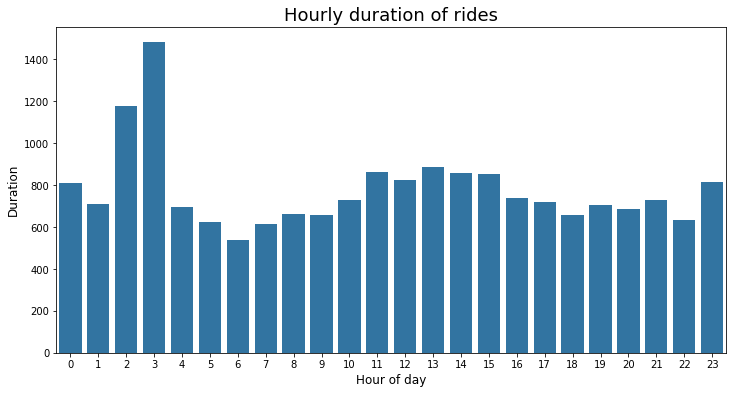

In [101]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_clean, x='hour', y='duration_sec', color=base_color, ci=None)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Hourly duration of rides', fontsize=18)
plt.show();

>**Observation: We can observe that peak hours doesn't contribute to the duration rather the highest duration happens at 3AM and next highest at 2AM.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Even though the frequency of rides are more for the subscribers, customers' trips were of long duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Most of the rides happened during peak hours but the long rides happened during the early part of the day
> * Long rides are more during the weekends than during weekdays

## Multivariate Exploration

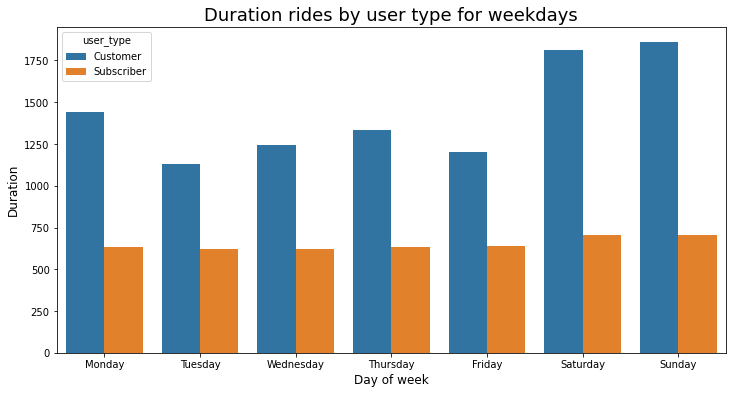

In [102]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_clean, x='weekday', y='duration_sec', hue='user_type', ci=None)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Duration rides by user type for weekdays', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show();

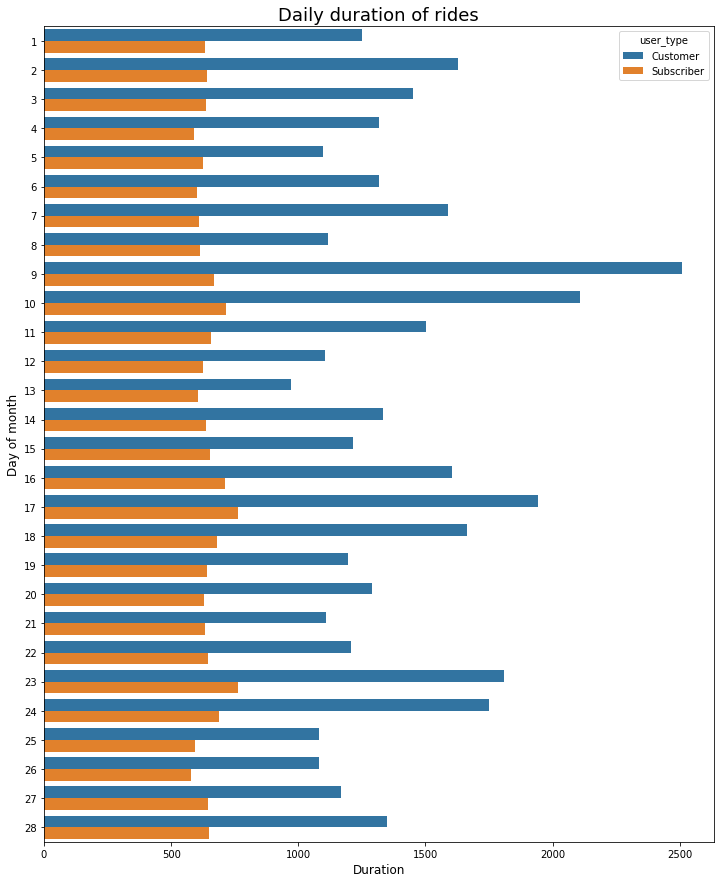

In [103]:
fig,ax = plt.subplots(figsize=(12,15))
sns.barplot(data=df_clean, y='day', x='duration_sec', orient='h', hue='user_type', ci=None)
plt.ylabel('Day of month', fontsize=12)
plt.xlabel('Duration', fontsize=12)
plt.title('Daily duration of rides', fontsize=18)
plt.show();

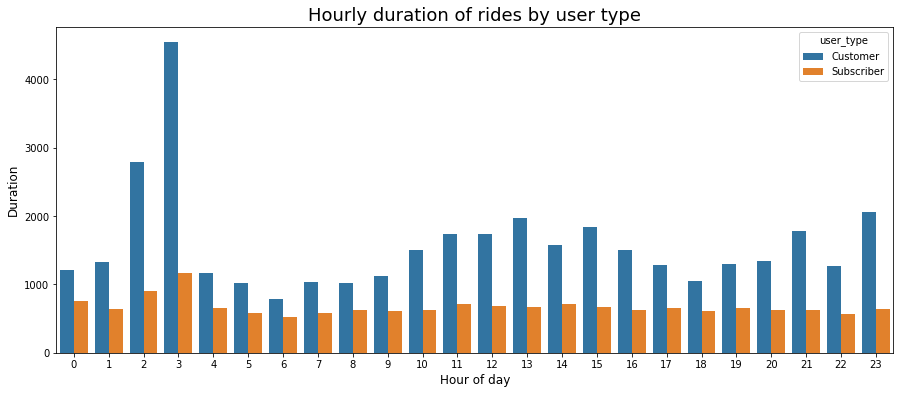

In [104]:
fig,ax = plt.subplots(figsize=(15,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_clean, x='hour', y='duration_sec', hue='user_type', ci=None)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Hourly duration of rides by user type', fontsize=18)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes

> * Subscriber' usage of ride share was constant across the hours wheras customers' usage is variying
> * Customers travelled longer time compared to subscribers
> * Customers were travelling long time over weekends

### Were there any interesting or surprising interactions between features?

> * Pattern of travel time observed during 2AM and 3AM where we expect rides to be longer during peak hours due to traffic

## Conclusions
>Based on univariate exploration following observations were made:
> * The data provided for analysis if the ride share data for February 2019
> * The frequency of rides were more for subscribers than customers. 89% of the rides are by subscibers and 11% by customers
> * Bike is shared for the whole trip only for 9% of the rides
> * Maximum number of rides happened on Thursdays and lowest on Saturday and Sunday compared to weekdays
> * Maximum number of rides were on 28th Feb and minimum on 9th Feb
> * Maximum number of rides were between 8-10AM and 5-7PM which are clearly peak hours
> * Market St at 10th St is where most rides originated
> * San Francisco Caltrain Station 2 had most rides in destination. Also, almost all stations in starting stations occurred on destination list too
> * 16th Street depot had the lowest rides for starting station and Willow St at Vine St has the lowest number of rides
> * 75% were male, 23% female and 2% Others based on gender data present

>Based on bivariate and multivariate data exploration the following observations were made:
> * Even though the frequency of duration by user type is higher for subscriber the average duration travelled by customers (~ 1400) is higher than the customers (~ 600).
> * Even though the frequency of rides is lesser during the weekends, we observe the rides were of longer duration  during weekends than during weekdays.
> * 17th February 2019 had the maximum duration of rides even though 28th Feb had the maximum frequency of rides
> * We can observe that peak hours doesn't contribute to the duration rather the highest duration happens at 3AM and next highest at 2AM.
> * Pattern of travel time observed during 2AM and 3AM where we expect rides to be longer during peak hours due to traffic

> Overall, the number of rides were more for subscribers who travelled more during weekdays and peak hours wheras the customers travelled more flexibly and more during weekends.

In [105]:
df_clean.to_csv('df_clean.csv', index=None)
df_test = pd.read_csv('df_clean.csv')

# Test
df_test

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,weekday,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,3,28
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,3,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,3,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,3,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,0,4,1
183211,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,0,4,1
183212,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,0,4,1
183213,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,0,4,1
